<a href="https://colab.research.google.com/github/sonluongvu/Palm_structure/blob/main/Primary_Structure_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download neccessary package

In [ ]:
! pip install biopython
! pip install logomaker

Getting alignment files

In [ ]:
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/alignments.fasta'
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/downstream_alignments.fasta'
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/upstream_alignments.fasta'

--2022-01-22 21:45:14--  https://github.com/sonluongvu/Palm_structure/raw/main/alignments.fasta
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sonluongvu/Palm_structure/main/alignments.fasta [following]
--2022-01-22 21:45:14--  https://raw.githubusercontent.com/sonluongvu/Palm_structure/main/alignments.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153265 (150K) [text/plain]
Saving to: ‘alignments.fasta.1’

alignments.fasta.1  100%[===================>] 149.67K  --.-KB/s    in 0.003s  

2022-01-22 21:45:14 (53.0 MB/s) - ‘alignments.fasta.1’ saved [153265/153265]

--2022-01-22 21:45:14-- 

Import libraries

In [ ]:
import pandas as pd
import numpy as np
from Bio import AlignIO
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import logomaker as lm

Parse alignment files

In [ ]:
alignment = AlignIO.read(open('/content/alignments.fasta'), 'fasta')
print(alignment[:5])

Alignment with 5 rows and 201 columns
AEMEQMALDVGLPSSKLKSKTSQLSGGMQRKLSVALAFVGGSKV...LPY SPALMS7
IPNPDFFEDLEPFRMTPFSAIGLELWSMTSDIFFDNFIICADRR...--- SPALMS8
RCRNEKKRHRAVRLIFTIMIVYFLFWAPYNIVLLLNTFQEFFGL...--- SPALMS9
RKKSGMQIALNDHLKQRREVAKTVFCLVLVFALCWLPLHLSRIL...--- SPALMS11
LSLCRMYRQQKRHQGSLGPRPRTGEDEVDHLILLALMTVVMAVC...--- SPALMS18


Extracting sequences from alignment (15 aa upstream and downstream)

In [ ]:
alignment_seq = []
for record in alignment:
  alignment_seq.append(str(record.seq)[85:116])
len(alignment_seq[1])

31

Create matrix from alignment sequence

In [ ]:
counts_mat = lm.alignment_to_matrix(sequences=alignment_seq, to_type='probability', characters_to_ignore='.-X')
counts_mat.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0.080501,0.019678,0.042934,0.023256,0.048301,0.071556,0.028623,0.064401,0.048301,0.164580,0.023256,0.023256,0.044723,0.017889,0.051878,0.046512,0.044723,0.100179,0.008945,0.046512
1,0.092362,0.028419,0.026643,0.049734,0.051510,0.044405,0.024867,0.067496,0.085258,0.134991,0.024867,0.019538,0.030195,0.040853,0.060391,0.051510,0.047957,0.088810,0.005329,0.024867
2,0.061947,0.024779,0.040708,0.026549,0.037168,0.065487,0.003540,0.044248,0.053097,0.162832,0.042478,0.031858,0.047788,0.031858,0.054867,0.069027,0.035398,0.125664,0.005310,0.035398
3,0.088183,0.031746,0.024691,0.040564,0.059965,0.059965,0.005291,0.058201,0.068783,0.109347,0.031746,0.058201,0.037037,0.031746,0.065256,0.084656,0.019400,0.079365,0.021164,0.024691
4,0.071553,0.041885,0.031414,0.052356,0.059337,0.052356,0.010471,0.043630,0.076789,0.137871,0.031414,0.038394,0.048866,0.019197,0.066318,0.052356,0.043630,0.076789,0.015707,0.029668


Create logo matrix

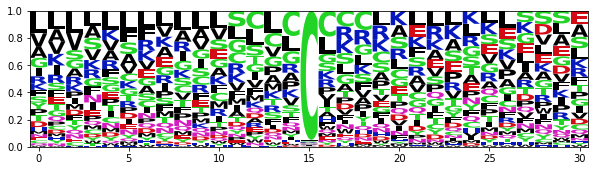

In [ ]:
lm.Logo(counts_mat)